In [8]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [12]:
# 加载糖尿病数据
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target
feature_names = diabetes.feature_names
samples = DataFrame(data=data,columns=feature_names)

In [14]:
linear = LinearRegression()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(samples,target,test_size=0.2,random_state=1)

In [20]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
y_ = linear.predict(X_test)

In [28]:
# 回归问题不能使用这种方式来评价
(y_ == y_test).sum()

0

In [31]:
y_[:10]

array([119.13799987, 110.77391294, 185.03753525,  68.01004306,
       171.05567482, 190.41947176, 218.59025339, 119.63203852,
       157.27055681, 129.49872542])

In [32]:
y_test[:10]

array([ 78., 152., 200.,  59., 311., 178., 332., 132., 156., 135.])

Text(0,0.5,'Predict')

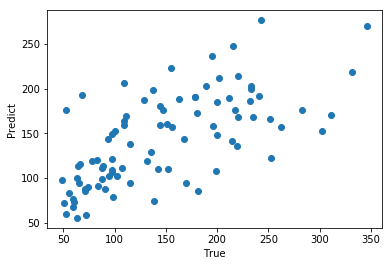

In [34]:
plt.scatter(y_test,y_)
plt.xlabel('True')
plt.ylabel('Predict')

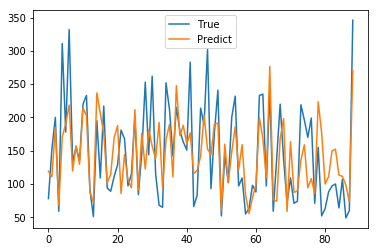

In [36]:
plt.plot(y_test,label='True')
plt.plot(y_,label='Predict')
plt.legend()

In [41]:
# 通过真实值和预测值的误差来比较算法的好坏
(((y_ - y_test)**2)**0.5).sum()/y_.size

41.97487568546232

(array([ 3.,  4.,  6.,  8., 10., 23., 20., 12.,  1.,  2.]),
 array([-149.5710078 , -122.15979093,  -94.74857405,  -67.33735718,
         -39.92614031,  -12.51492344,   14.89629343,   42.30751031,
          69.71872718,   97.12994405,  124.54116092]),
 <a list of 10 Patch objects>)

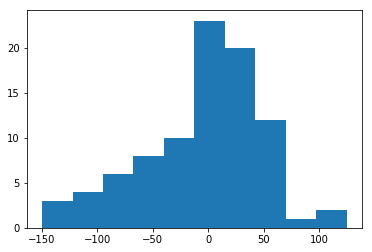

In [42]:
# 残差直方图
plt.hist(y_ - y_test)

In [46]:
samples.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [56]:
# 研究的对象是什么
# 对对象可能产生影响的因素是什么

target1 = target
# Series对象没有reshape函数,所以读取values再reshape
train1 = samples['s1'].values.reshape(-1,1)

In [57]:
from sklearn.neighbors import KNeighborsRegressor
linear = LinearRegression()
knn = KNeighborsRegressor()

X_train,X_test,y_train,y_test = train_test_split(train1,target1,test_size=0.2,random_state=1)

In [58]:
linear.fit(X_train,y_train)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [59]:
linear_y_ = linear.predict(X_test)
knn_y_ = knn.predict(X_test)

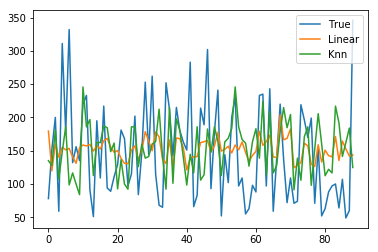

In [62]:
plt.plot(y_test,label='True')
plt.plot(linear_y_,label='Linear')
plt.plot(knn_y_,label='Knn')
plt.legend()

In [66]:
linear.fit(train1,target1)
knn.fit(train1,target1)

X_test = np.linspace(train1.min(),train1.max(),100).reshape(-1,1)
y1_ = linear.predict(X_test)
y2_ = knn.predict(X_test)

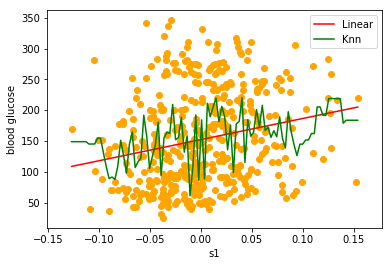

In [69]:
# 血糖含量和s1的关系
plt.scatter(train1,target1,color='orange')
plt.xlabel('s1')
plt.ylabel('blood glucose')

plt.plot(X_test,y1_,label='Linear',color='red')
plt.plot(X_test,y2_,label='Knn',color='green')
plt.legend()